In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("data/TARP.csv")
df.head()

,Soil Moisture,Temperature,Soil Humidity,Time,Air temperature (C),Wind speed (Km/h),Air humidity (%),Wind gust (Km/h),Pressure (KPa),ph,rainfall,N,P,K,Status
0,54,22,70,21,19.52,2.13,55.04,6.30,101.50,6.502985,202.935536,90.0,42.0,43.0,ON
1,12,20,40,104,19.49,2.01,55.17,10.46,101.50,7.038096,226.655537,85.0,58.0,41.0,OFF
2,34,26,35,62,19.47,1.90,55.30,14.63,101.51,7.840207,263.964248,60.0,55.0,44.0,ON
3,7,44,44,93,19.54,2.28,54.20,16.08,101.51,6.980401,242.864034,74.0,35.0,40.0,OFF
4,50,38,23,92,19.61,2.66,53.09,17.52,101.51,7.628473,262.717340,78.0,42.0,42.0,OFF


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Soil Moisture        100000 non-null  int64  
 1   Temperature          100000 non-null  int64  
 2    Soil Humidity       100000 non-null  int64  
 3   Time                 100000 non-null  int64  
 4   Air temperature (C)  23995 non-null   float64
 5   Wind speed (Km/h)    23995 non-null   float64
 6   Air humidity (%)     23995 non-null   float64
 7   Wind gust (Km/h)     23995 non-null   float64
 8   Pressure (KPa)       23995 non-null   float64
 9   ph                   2200 non-null    float64
 10  rainfall             2200 non-null    float64
 11  N                    2200 non-null    float64
 12  P                    2200 non-null    float64
 13  K                    2200 non-null    float64
 14  Status               100000 non-null  object 
dtypes: float64(10), in

In [5]:
df.describe()

,Soil Moisture,Temperature,Soil Humidity,Time,Air temperature (C),Wind speed (Km/h),Air humidity (%),Wind gust (Km/h),Pressure (KPa),ph,rainfall,N,P,K
count,100000.000000,100000.000000,100000.000000,100000.000000,23995.000000,23995.000000,23995.000000,23995.000000,23995.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,45.484070,22.536100,45.016790,55.253650,24.263780,9.896898,58.521052,41.744905,101.131418,6.469480,103.463655,50.551818,53.362727,48.149091
std,25.993998,13.251352,14.726676,32.093033,6.756751,4.325666,30.073448,24.168987,0.218448,0.773938,54.958389,36.917334,32.985883,50.647931
min,1.000000,0.000000,20.000000,0.000000,11.220000,0.000000,0.590000,0.000000,100.500000,3.504752,20.211267,0.000000,5.000000,5.000000
25%,23.000000,11.000000,32.000000,28.000000,18.580000,6.830000,33.980000,21.820000,100.980000,5.971693,64.551686,21.000000,28.000000,20.000000
50%,45.000000,23.000000,45.000000,55.000000,22.150000,9.530000,61.310000,37.240000,101.120000,6.425045,94.867624,37.000000,51.000000,32.000000
75%,68.000000,34.000000,58.000000,83.000000,29.590000,12.460000,86.360000,59.275000,101.260000,6.923643,124.267508,84.250000,68.000000,49.000000
max,90.000000,45.000000,70.000000,110.000000,45.560000,31.360000,96.000000,133.330000,101.860000,9.935091,298.560117,140.000000,145.000000,205.000000


In [6]:
df_corr = df.drop(columns = ['Status']).corr()

In [7]:
df_corr

,Soil Moisture,Temperature,Soil Humidity,Time,Air temperature (C),Wind speed (Km/h),Air humidity (%),Wind gust (Km/h),Pressure (KPa),ph,rainfall,N,P,K
Soil Moisture,1.000000,0.003622,0.003141,-0.001903,-0.005880,-0.010232,0.005071,-0.009487,-0.004919,-0.004841,-0.068431,0.002837,0.014676,0.002477
Temperature,0.003622,1.000000,-0.002637,0.004481,0.002254,-0.010666,-0.007844,-0.008633,0.006293,0.014920,-0.011053,-0.003259,-0.048775,-0.061793
Soil Humidity,0.003141,-0.002637,1.000000,0.007086,-0.004767,0.007147,0.005023,0.000373,-0.002049,0.010169,-0.008299,0.034708,0.008786,0.004981
Time,-0.001903,0.004481,0.007086,1.000000,0.001679,-0.003651,0.001434,-0.005155,0.001988,0.013114,0.035622,0.022229,0.001811,0.015597
Air temperature (C),-0.005880,0.002254,-0.004767,0.001679,1.000000,0.478559,-0.774597,0.453347,-0.030314,0.053493,-0.067627,0.148751,-0.019210,-0.185985
Wind speed (Km/h),-0.010232,-0.010666,0.007147,-0.003651,0.478559,1.000000,-0.266582,0.853637,-0.188620,-0.027904,0.023618,0.046556,0.065287,0.025180
Air humidity (%),0.005071,-0.007844,0.005023,0.001434,-0.774597,-0.266582,1.000000,-0.349823,-0.290853,-0.041795,0.134566,-0.026434,0.025571,0.100622
Wind gust (Km/h),-0.009487,-0.008633,0.000373,-0.005155,0.453347,0.853637,-0.349823,1.000000,-0.091390,-0.008664,0.099584,0.014765,0.049744,0.033494
Pressure (KPa),-0.004919,0.006293,-0.002049,0.001988,-0.030314,-0.188620,-0.290853,-0.091390,1.000000,-0.082991,0.338662,0.186168,-0.023673,0.311239
ph,-0.004841,0.014920,0.010169,0.013114,0.053493,-0.027904,-0.041795,-0.008664,-0.082991,1.000000,-0.109069,0.096683,-0.138019,-0.169503


In [8]:
df.columns

Index(['Soil Moisture', 'Temperature', ' Soil Humidity', 'Time',
       'Air temperature (C)', 'Wind speed (Km/h)', 'Air humidity (%)',
       'Wind gust (Km/h)', 'Pressure (KPa)', 'ph', 'rainfall', 'N', 'P', 'K',
       'Status'],
      dtype='object')

In [9]:
df.drop(columns = ["Time","Air temperature (C)","Wind speed (Km/h)","ph","Wind gust (Km/h)","rainfall","N","P","K"],inplace = True)

In [10]:
df.head()

,Soil Moisture,Temperature,Soil Humidity,Air humidity (%),Pressure (KPa),Status
0,54,22,70,55.04,101.50,ON
1,12,20,40,55.17,101.50,OFF
2,34,26,35,55.30,101.51,ON
3,7,44,44,54.20,101.51,OFF
4,50,38,23,53.09,101.51,OFF


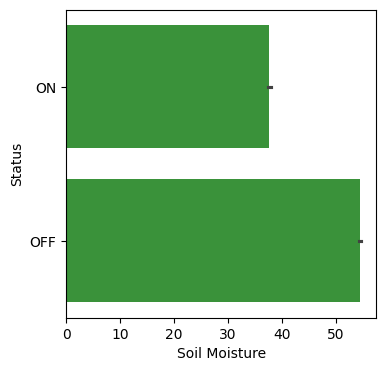

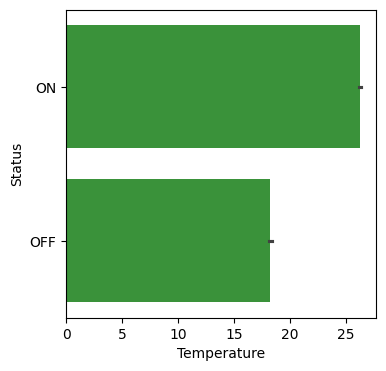

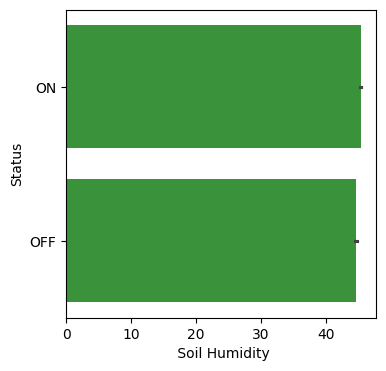

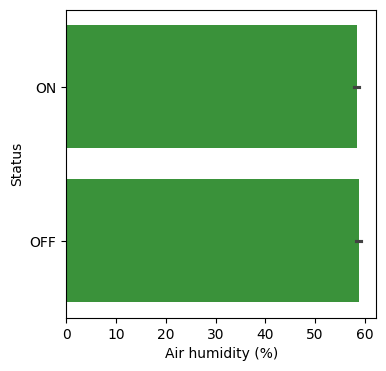

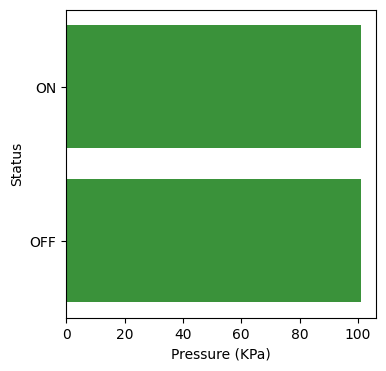

In [11]:
for i in df.columns:
    if i == "Status":
        break
    plt.figure(figsize=(4,4))
    sns.set_palette("muted")
    sns.barplot(data = df,x = i, y = "Status",color = "#2ca02c")
    plt.show()

In [12]:
df.columns=["Soil Moisture","Temperature","Soil Humidity","Air Humidity","Pressure","Status"]
df.head()

,Soil Moisture,Temperature,Soil Humidity,Air Humidity,Pressure,Status
0,54,22,70,55.04,101.50,ON
1,12,20,40,55.17,101.50,OFF
2,34,26,35,55.30,101.51,ON
3,7,44,44,54.20,101.51,OFF
4,50,38,23,53.09,101.51,OFF


In [13]:
import os
director = os.path.join(os.getcwd(),"data")
os.makedirs(director,exist_ok = True)
file_path = os.path.join(director,"raw.csv")
df.to_csv(path_or_buf=file_path,index = False,header=True)